In [1]:
from fbprophet import Prophet
from datetime import date
import pandas as pd

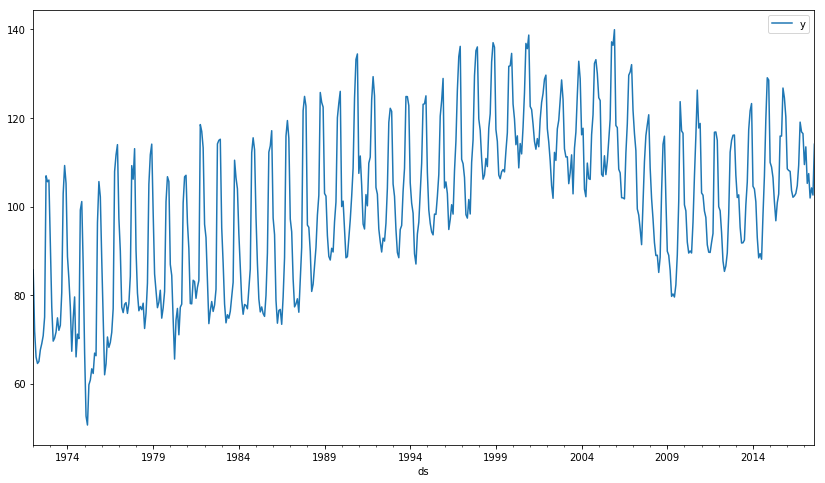

In [2]:
%run setup_workspace.ipynb

In [3]:
data = candy_production
data.head()

ds        y
0 1972-01-01  85.6945
1 1972-02-01  71.8200
2 1972-03-01  66.0229
3 1972-04-01  64.5645
4 1972-05-01  65.0100

# Creating a Prophet model

## 1. Train-test-split

In [4]:
split_date = pd.Timestamp(date(2016,1,1))
min_date = None
max_date = None

train = data[data.ds < split_date]
if min_date is not None:
    train = train[train['ds'] > min_date]
test = data[data.ds > split_date]

if max_date is not None:
    test = test[test['ds'] < max_date]

## 2. Model training

In [5]:
%%time
#model = Prophet() # 8.62
model = Prophet(changepoint_prior_scale=20) #8.07
model.fit(train)

/home/veronika/.virtualenvs/idsc-2019/lib/python3.5/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CPU times: user 768 ms, sys: 0 ns, total: 768 ms
Wall time: 777 ms


## 3. Forecast

In [6]:
future = test[['ds']]
forecast = model.predict(future)

## 4. Evaluation

In [7]:
error = mean_absolute_percentage_error(test[['y']].values, forecast[['yhat']].values)
print('MAPE:%0.2f%%'%error)

MAPE:7.48%


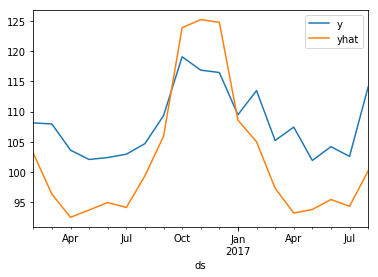

In [8]:
tmp = test.copy().reset_index(drop=True)
tmp['yhat'] = forecast.yhat
tmp.set_index('ds', drop=True).plot()

## 5. Decomposition

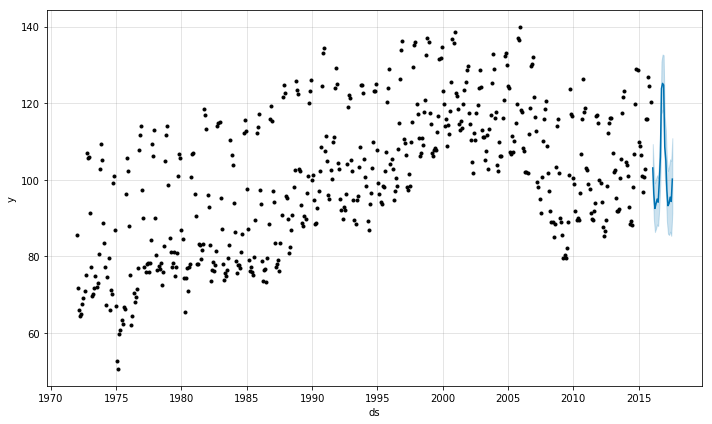

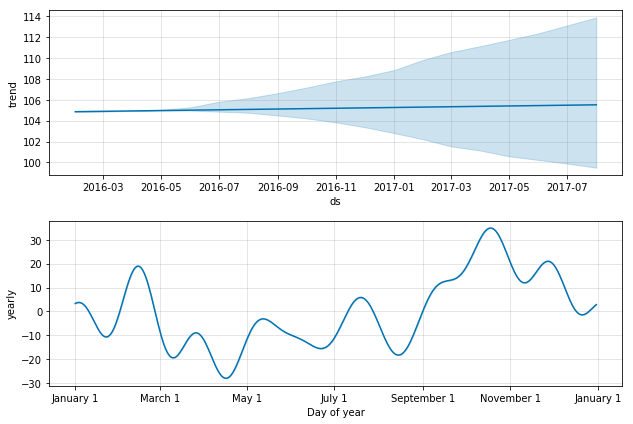

In [9]:
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)